# Interpolation Polynomials

In [1]:
function [C,D] = newpoly(X,Y)
%Find the interpolation polynomial
%Input   - X is a column vector that contains a list of abscissas
%        - Y is a column vector that contains a list of ordinates
%Output  - C is a vector that contains the coefficients
%          of the Newton interpolation polynomial
%        - D is the divided difference table

n = length(X);
D = zeros(n,n);
D(:,1) = Y;

%Form the divided difference table

for j=2:n
   for k=j:n
      D(k,j) = (D(k,j-1)-D(k-1,j-1)) / (X(k)-X(k-j+1));
   end
end

%Determine the coefficients of the Newton interpolation polynomial

C=D(n,n);

for k=(n-1):-1:1
   C = conv(C,poly(X(k)));
   m = length(C);
   C(m) = C(m)+D(k,k);
end
end %function newpoly

error: graphics_toolkit: qt toolkit is not available
error: called from
    graphics_toolkit at line 81 column 5



Inline plot failed, consider trying another graphics toolkit
error: '_make_figures' undefined near line 1 column 1



In [2]:
function [X,Y] = generatedata(n,maxy)
% Generate the data with uniform X from 0 to n
% and random Y from 0 to maxy
% n and maxy are positive integers
X = [0:1:n]';
Y = fix(rand(n+1,1)*(maxy+1));
end %function generatedata

error: graphics_toolkit: qt toolkit is not available
error: called from
    graphics_toolkit at line 81 column 5



In [3]:
function plotpoly(X,Y)
%Input   - X is a vector that contains a list of abscissas
%        - Y is a vector that contains a list of ordinates
    clf;
    axis([min(X) max(X) min(Y)-1 max(Y)+1]);
    hold on
    plot(X,Y,'or');
    XP = linspace(min(X),max(X),101);
    YP = polyval(newpoly(X,Y),XP);
    plot(XP,YP,'b-');
    legend({'Data','Newton Polynomial'},'FontSize',12,"location", "northeast");
end %function plotpoly

In [4]:
[X,Y] = generatedata(6,5);  %Create the data set

In [5]:
[C,D] = newpoly(X,Y)  %Interpolation polynomial

C =

   -0.11250    2.02083  -13.68750   43.06250  -61.70000   32.41667    0.00000

D =

   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   2.00000   2.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   1.00000  -1.00000  -1.50000   0.00000   0.00000   0.00000   0.00000
   5.00000   4.00000   2.50000   1.33333   0.00000   0.00000   0.00000
   3.00000  -2.00000  -3.00000  -1.83333  -0.79167   0.00000   0.00000
   5.00000   2.00000   2.00000   1.66667   0.87500   0.33333   0.00000
   1.00000  -4.00000  -3.00000  -1.66667  -0.83333  -0.34167  -0.11250



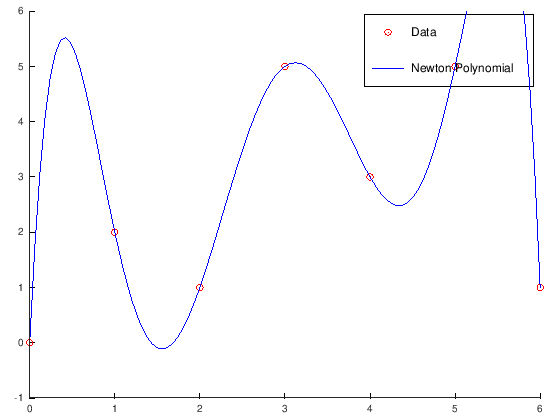

In [6]:
plotpoly(X,Y) %Plot the data along with the interpolating polynomial